In [1]:
# importing all essential libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to remove unwanted warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset and converting it into dataframe:
data=pd.DataFrame(pd.read_csv("advertising.csv"))

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Data Inspection:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Data cleaning 

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Data Visualization

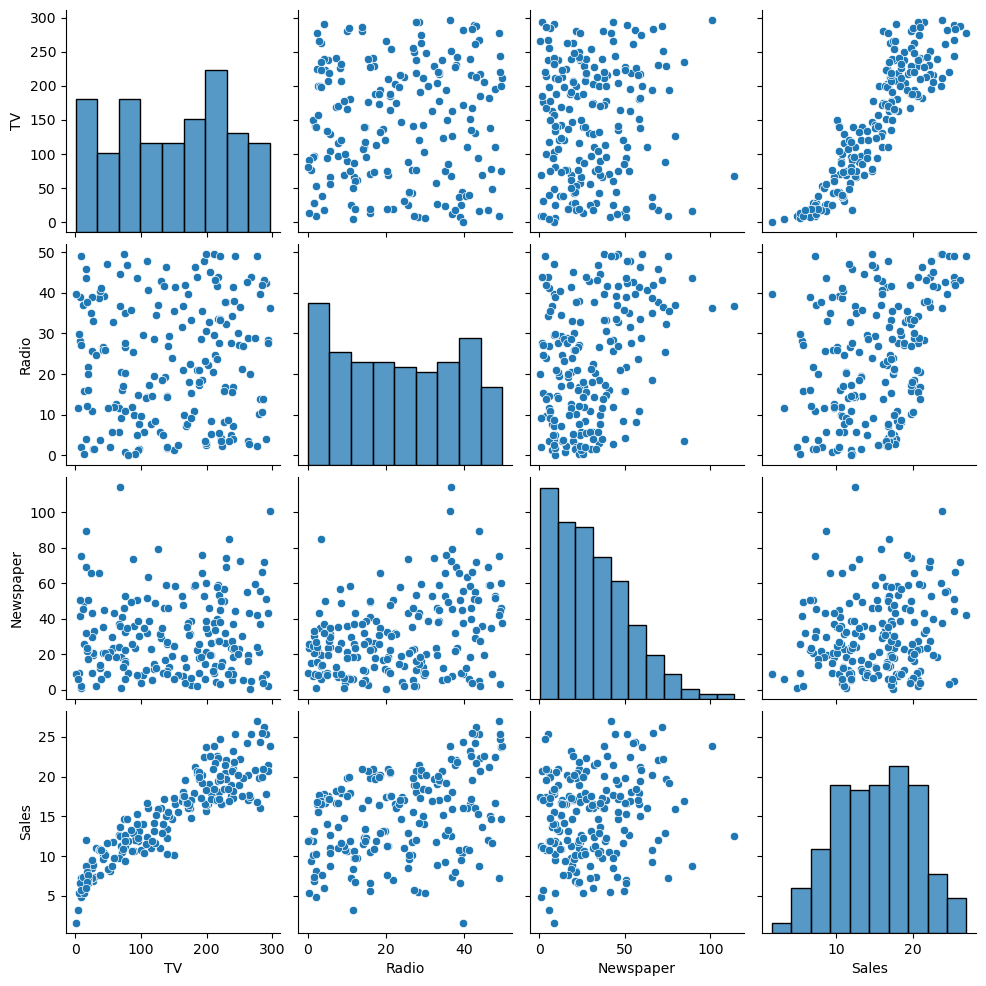

In [10]:
# pair plot to visualize relationship

sns.pairplot(data)
plt.show()

<AxesSubplot: >

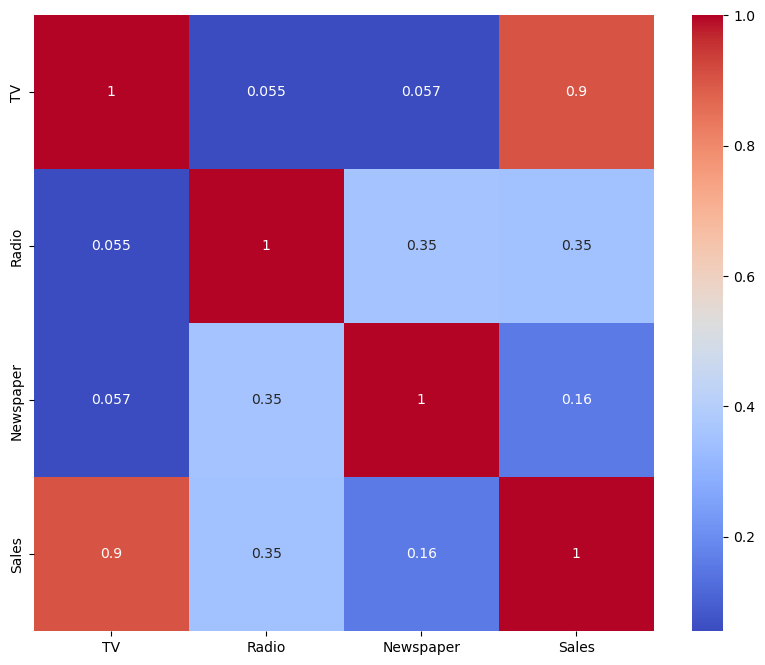

In [11]:
# Co relation heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')

# Model BUilding

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
# split the data into features(X) and target (y)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
y


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training a linear model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [17]:
# predict the model into test data:
y_pred=model.predict(X_test)

In [25]:
# Evalvate the model 
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Importing the necessary module to display HTML
from IPython.display import display, HTML

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {score}")


Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
R^2 Score: 0.9059011844150826


# hyperparameter tuning


In [19]:
# ican use Grid Search to find the best hyperparameters for a more complex model like Random Forest.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import GridSearchCV

#Define the model:

rf=RandomForestRegressor(random_state=42)

#definig the parameter grid:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R^2 Score: {r2_best}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END m

# cross validation

In [20]:
best_model

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [21]:
# so We can use cross-validation to evaluate the model's performance more robustly.

from sklearn.model_selection import cross_val_score

cv_score=cross_val_score(best_model,X,y,cv=5,scoring='r2')

In [22]:
print(f"Cross-validated R^2 scores: {cv_score}")
print(f"Mean R^2 score: {cv_score.mean()}")
print(f"Standard Deviation of R^2 score: {cv_score.std()}")

Cross-validated R^2 scores: [0.93560329 0.97317493 0.94752384 0.90914046 0.95001657]
Mean R^2 score: 0.9430918176307339
Standard Deviation of R^2 score: 0.020887131461818226


# Model Used: Random Forest Regressor

### Cross-Validation Results
Cross-validation is a robust method for assessing the performance of a model by dividing the dataset into multiple folds and evaluating the model on each fold. This helps in understanding the model's generalizability to unseen data.

### Cross-validated R^2 Scores:

Fold 1: 0.9356
Fold 2: 0.9732
Fold 3: 0.9475
Fold 4: 0.9091
Fold 5: 0.9500
## Mean R^2 Score: 0.9431

### Standard Deviation of R^2 Score: 0.0209

### Interpretation
*High R^2 Scores: The R^2 scores across all folds are consistently high, with values ranging from 0.9091 to 0.9732. This indicates that the model explains a large portion of the variance in the target variable (sales) and has good predictive power.

*Mean R^2 Score: The mean R^2 score of 0.9431 suggests that, on average, the model explains approximately 94.31% of the variance in the sales data. This high average score reflects the overall accuracy and reliability of the model.

*Standard Deviation of R^2 Scores: The standard deviation of 0.0209 indicates that there is very little variation in the R^2 scores across different folds. This low standard deviation demonstrates the model's stability and consistency in performance across different subsets of the data.

## Conclusion
The Random Forest Regressor model shows excellent performance in predicting sales, with high R^2 scores across all cross-validation folds. The model's high mean R^2 score and low standard deviation indicate that it is both accurate and reliable. These results suggest that the model can be confidently used for making sales predictions and optimizing advertising strategies to maximize sales potential.

# finding the feature importance

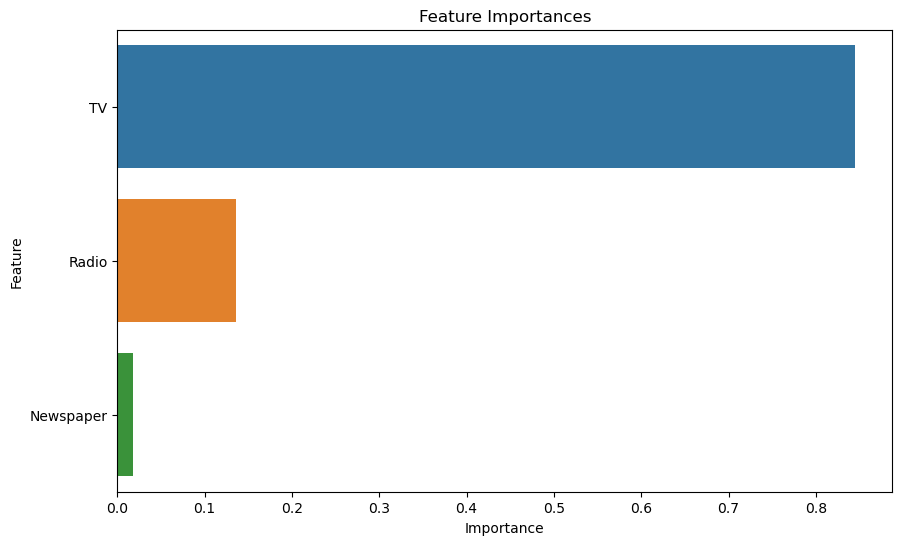

In [23]:
# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


# More Data Visualization

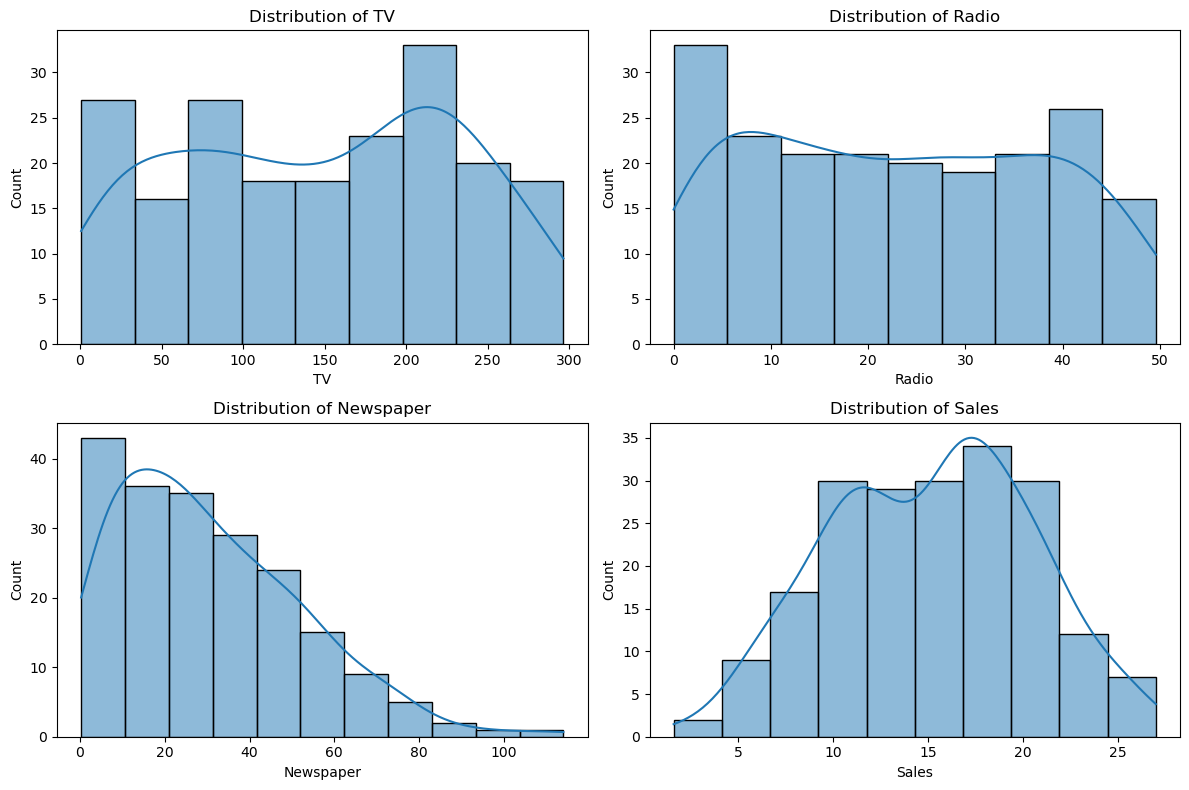

In [24]:
# Distribution of features
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


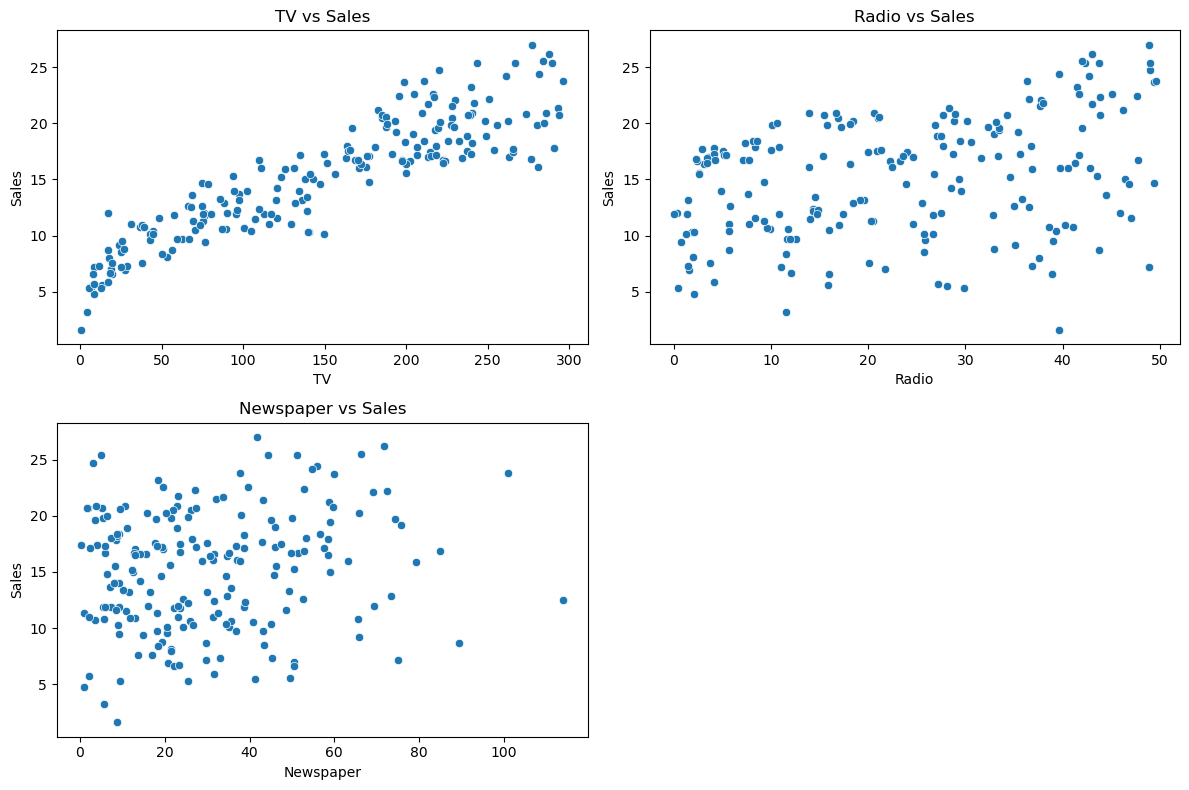

In [27]:
# Scatter plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1], 1):  # Exclude 'Sales' column
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[col], y=data['Sales'])
    plt.title(f'{col} vs Sales')
plt.tight_layout()
plt.show()


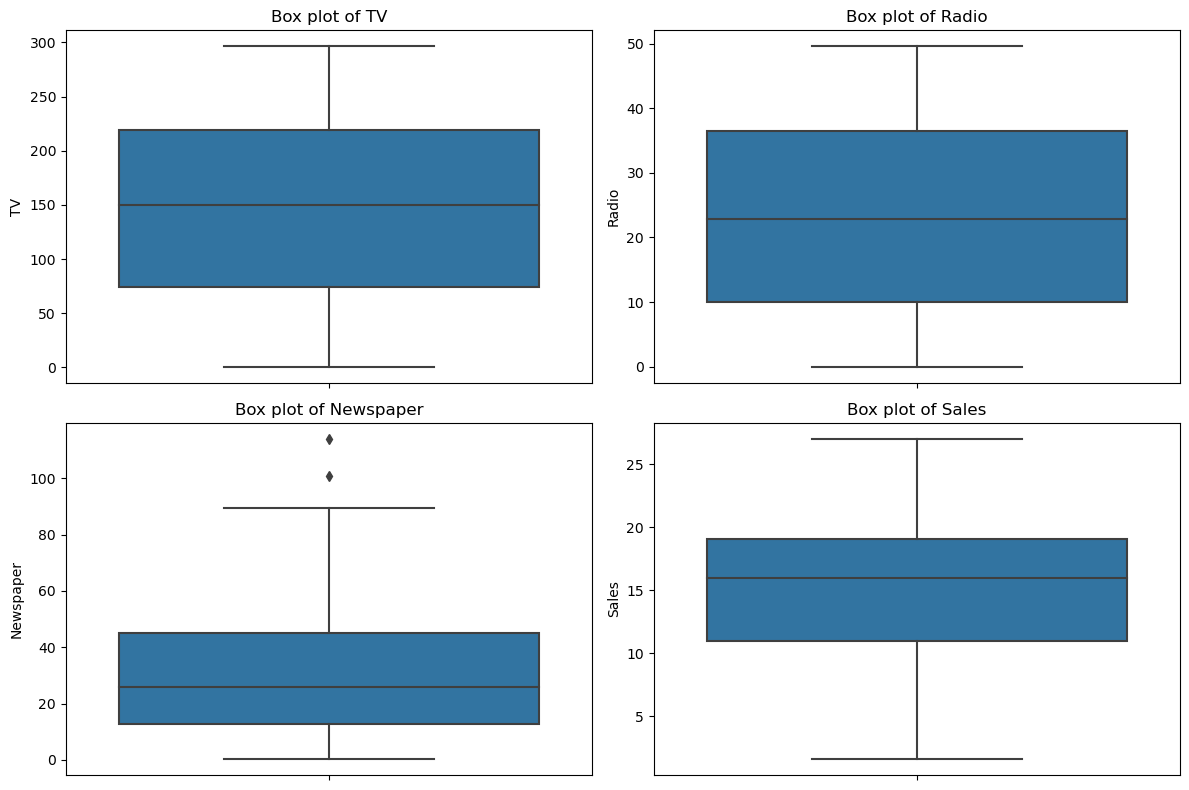

In [26]:
# Box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()
